# HW6

### 2015129053 Hyoung Chul KIm

1. 



  (a) I used following codes to plot the time series of the reported cases:

In [1]:
#data proprocessing stage

#import the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

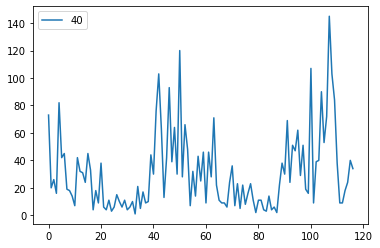

In [2]:
#(a) drawing the time series plot of the reported cases. 

data=pd.read_csv("case.csv")
data.plot()
plt.show()

  There does not seem to be a strict pattern. But it seems that the reported cases of rotavirus were high around 50 week and 110 week. Also, as one year is made up of around 52 weeks, we can see that the shape of the time series is repeated every 52 weeks. (They are both U shape) Thus it might have some yearly patterns. 

(b) I constructed a LSTM model to estimate the reported cases by using the previous 30 weeks’ information. I used following codes**(Keep in mind that I followed the procedure that I learned in the stock price prediction example)**:

In [3]:
data=pd.DataFrame(data=data)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled = sc.fit_transform(data)

In [4]:
#(b) previous 30 week's info

# Creating a data structure
X_train = []
y_train = []
for i in range(30, 117):
    X_train.append(data_scaled[i-30:i,0])
    y_train.append(data_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.5       , 0.13194444, 0.17361111, ..., 0.0625    , 0.03472222,
        0.06944444],
       [0.13194444, 0.17361111, 0.10416667, ..., 0.03472222, 0.06944444,
        0.02083333],
       [0.17361111, 0.10416667, 0.5625    , ..., 0.06944444, 0.02083333,
        0.03472222],
       ...,
       [0.09027778, 0.02083333, 0.03472222, ..., 0.05555556, 0.05555556,
        0.11805556],
       [0.02083333, 0.03472222, 0.00694444, ..., 0.05555556, 0.11805556,
        0.15972222],
       [0.03472222, 0.00694444, 0.14583333, ..., 0.11805556, 0.15972222,
        0.27083333]])

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.5       ],
        [0.13194444],
        [0.17361111],
        ...,
        [0.0625    ],
        [0.03472222],
        [0.06944444]],

       [[0.13194444],
        [0.17361111],
        [0.10416667],
        ...,
        [0.03472222],
        [0.06944444],
        [0.02083333]],

       [[0.17361111],
        [0.10416667],
        [0.5625    ],
        ...,
        [0.06944444],
        [0.02083333],
        [0.03472222]],

       ...,

       [[0.09027778],
        [0.02083333],
        [0.03472222],
        ...,
        [0.05555556],
        [0.05555556],
        [0.11805556]],

       [[0.02083333],
        [0.03472222],
        [0.00694444],
        ...,
        [0.05555556],
        [0.11805556],
        [0.15972222]],

       [[0.03472222],
        [0.00694444],
        [0.14583333],
        ...,
        [0.11805556],
        [0.15972222],
        [0.27083333]]])

In [6]:
# Part 2 - Build the RNN

# Importing the libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
# Start the RNN
regressor = Sequential()

# Add the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

In [8]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.23))

In [9]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55))
regressor.add(Dropout(0.2))

In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 170, batch_size = 10)



Epoch 1/170
9/9 [==============================] - 4s 39ms/step - loss: 0.0219
Epoch 2/170
9/9 [==============================] - 0s 28ms/step - loss: 0.0221
Epoch 3/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0204
Epoch 4/170
9/9 [==============================] - 0s 28ms/step - loss: 0.0190
Epoch 5/170
9/9 [==============================] - 0s 28ms/step - loss: 0.0220
Epoch 6/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0220
Epoch 7/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0169
Epoch 8/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0238
Epoch 9/170
9/9 [==============================] - 0s 28ms/step - loss: 0.0196
Epoch 10/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0219
Epoch 11/170
9/9 [==============================] - 0s 27ms/step - loss: 0.0238
Epoch 12/170
9/9 [==============================] - 0s 26ms/step - loss: 0.0189
Epoch 13/170
9/9 [==============================]

From this, we can see that the MSE is **0.0080**

In [15]:
# Part 3 - Making the predictions and visualising the results


data_test = pd.read_csv('case.csv')
real_disease = data_test.values

In [16]:
inputs = data_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 117):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_disease = regressor.predict(X_test)
predicted_disease = sc.inverse_transform(predicted_disease)

Now I visualize to compare the estimated and true reported cases:

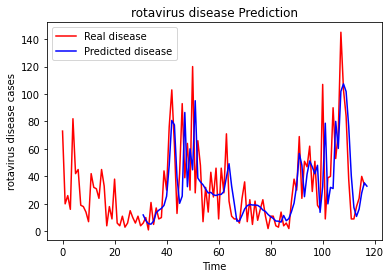

In [18]:
# Visualizing the results
plt.plot(real_disease, color = 'red', label = 'Real disease')
plt.plot(range(31, 31+len(predicted_disease)), predicted_disease, color = 'blue', label = 'Predicted disease')

plt.title('rotavirus disease Prediction')
plt.xlabel('Time')
plt.ylabel('rotavirus disease cases')
plt.legend()
plt.show()

We can easily see that the prediction is quite accurate. So the RNN is fitted well. However, there could be some problem as the prediction fits the real data a bit **too** well. This could mean that there can be some overfitting issues. Still, the MSE changes (little bit) everytime I run the **regressor.fit function**. So there were also sometimes where the prediction graph was not this accurate. Also, the problem could be solved by applying more dropouts.